# Calculation of QR Decomposition:

- Implement [**QR decomposition**](https://en.wikipedia.org/wiki/QR_decomposition) for finding $Q$ and $R$ matrices.

In [1]:
# import section
import numpy as np
import math
import copy
from time import time

In [2]:
input_matrix = np.array([[4,-30,60,-35], [-30,300,-675,420], [60,-675,1620,-1050], [-35,420,-1050,700]], dtype = float)
# input_matrix = np.array([[12, -51, 4], [-51, 167, -68], [4, -68, -41]], dtype=np.float)

input_matrix

array([[    4.,   -30.,    60.,   -35.],
       [  -30.,   300.,  -675.,   420.],
       [   60.,  -675.,  1620., -1050.],
       [  -35.,   420., -1050.,   700.]])

In [3]:
def read_file(file_name):
    with open(file_name, 'r') as f:
        matrix = [[float(num) for num in line.split(',')] for line in f]
    matrix = np.array(matrix)
    return matrix

In [4]:
# matrix = read_file('data_8.txt')   
# print("Input Matrix = \n",matrix)
# print("\nMatrix Shape = ",np.shape(matrix))

# input_matrix = copy.deepcopy(matrix)

## Projection definition:
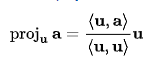
## Dot product:
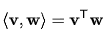

In [5]:
def projection(u, a):
    t1 = np.dot(u.T, a)
    t2 = np.dot(u.T, u)
    return (t1 / t2) * u

In [6]:
def vec_length(v):
    t = 0
    for i in v:
        t += i*i
    return math.sqrt(t)

def vec_norm(v):
    return math.sqrt(np.dot(v.T, v))


assert vec_length(np.array([12, 6, -4])) == vec_norm(np.array([12, 6, -4])) == np.linalg.norm(np.array([12, 6, -4]))

## QR Decomposition - Using the Gram–Schmidt process:
- For giveen matrix $A[a1,a2,...,an]$ in size $ N x N$ we will performe:
 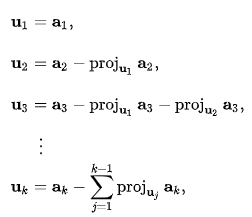
 Such that: $U=[u1,u2,...,un]$

In [7]:
def Gram_Schmidt_process(input_matrix):
    t = copy.deepcopy(input_matrix.T)
    
    U = np.array([t[0]])
    index = 1
    
    for a in t[1:]:
        b = copy.deepcopy(a)
        for j in range(index):
            b = b - projection(U[j] , a)
            
        index += 1
        U = np.append(U, [b], axis=0) 
        
    return U.T  

In [8]:
Gram_Schmidt_process(input_matrix)

array([[  4.        ,  14.81449225,   7.03526974,   0.41476995],
       [-30.        , -36.10869187,  -1.1424035 ,   0.33181596],
       [ 60.        ,  -2.78261627,  -4.33731257,   0.2765133 ],
       [-35.        ,  27.87319282,  -5.65215915,   0.2370114 ]])

## Find Q matrix:
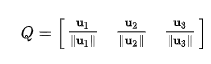
Q is an **orthogonal** matrix and has the property of:
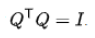

In [9]:
# get U matrix and convert it to Q matrix by the example.

def Q_matrix(U):
    t = copy.deepcopy(U.T)
    
    vec = (1 / vec_length(t[0])) * t[0]
    Q = np.array([vec])
    for i in t[1:]:
        vec = (1 / vec_length(i)) * i
        Q = np.append(Q, [vec], axis=0)
        
    return Q.T

In [10]:
Q = Q_matrix(Gram_Schmidt_process(input_matrix)) 
print("Q =\n",Q)

Q =
 [[ 0.05279177  0.30837005  0.69810529  0.64402636]
 [-0.39593827 -0.75161801 -0.11335996  0.51522109]
 [ 0.79187654 -0.05792136 -0.43038873  0.4293509 ]
 [-0.46192798  0.58019254 -0.56086011  0.36801506]]


## Find R matrix:
- R is an **upper triangular** matrix.

In [11]:
def R_matrix(input_matrix, Q):
    R = np.dot(Q.T, input_matrix)    
    return np.round(R, decimals=3)

In [12]:
R = R_matrix(input_matrix, Q_matrix(Gram_Schmidt_process(input_matrix)))
print("R = \n",R)

R = 
 [[ 7.576900e+01 -8.488920e+02  2.038290e+03 -1.322962e+03]
 [ 0.000000e+00  4.804100e+01 -1.771900e+02  1.404800e+02]
 [ 0.000000e+00 -0.000000e+00  1.007800e+01 -1.273900e+01]
 [-0.000000e+00 -0.000000e+00  0.000000e+00  6.440000e-01]]


# QR decomposition:

In [13]:
def QR_decomposition(input_matrix):
    Q = Q_matrix(Gram_Schmidt_process(input_matrix))
    R = R_matrix(input_matrix, Q)
    return Q, R

## Performance Assessments:

### Print our QR decomposition:

In [14]:
A = np.dot(input_matrix.T, input_matrix)
print("Program QR decomposition results:\n")

start = time()
Q, R = QR_decomposition(A)
print("Q = \n{}".format(Q))
print("R = \n{}".format(R))
print("Time = {}".format(time() - start))

Program QR decomposition results:

Q = 
[[ 0.0294237   0.18373921  0.60101627  0.77568595]
 [-0.32965205 -0.74426285 -0.35295308  0.46225831]
 [ 0.79153393  0.09535238 -0.5018093   0.33683612]
 [-0.51374878  0.63499656 -0.51224115  0.26677702]]
R = 
[[ 1.95114819e+05 -2.19695881e+06  5.28942183e+06 -3.43902862e+06]
 [-0.00000000e+00  1.75606500e+03 -6.54872100e+03  5.22605700e+03]
 [-0.00000000e+00  0.00000000e+00  1.47960000e+01 -1.89160000e+01]
 [-0.00000000e+00  6.00000000e-03 -6.00000000e-02  1.76000000e-01]]
Time = 0.0019979476928710938


### Print QR decomposition made by NumPy library:

In [15]:
print("NumPy Library QR decomposition results:\n")

start = time()
Q, R = np.linalg.qr(A)
print("Q = \n{}".format(Q))
print("R = \n{}".format(R))
print("Time = {}".format(time() - start))

NumPy Library QR decomposition results:

Q = 
[[-0.0294237   0.18373921  0.60101627  0.77727318]
 [ 0.32965205 -0.74426285 -0.35295305  0.4613312 ]
 [-0.79153393  0.09535238 -0.50180931  0.3355136 ]
 [ 0.51374878  0.63499656 -0.51224117  0.26542521]]
R = 
[[-1.95114819e+05  2.19695881e+06 -5.28942183e+06  3.43902862e+06]
 [ 0.00000000e+00  1.75606505e+03 -6.54872094e+03  5.22605691e+03]
 [ 0.00000000e+00  0.00000000e+00  1.47966474e+01 -1.89163241e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.10090402e-01]]
Time = 0.0019943714141845703


### Print QR decomposition made by SciPy library:

In [16]:
print("SciPy Library QR decomposition results:\n")
from scipy import linalg

start = time()
Q, R = linalg.qr(A)
print("Q = \n{}".format(Q))
print("R = \n{}".format(R))
print("Time = {}".format(time() - start))

SciPy Library QR decomposition results:

Q = 
[[-0.0294237   0.18373921  0.60101627  0.77727318]
 [ 0.32965205 -0.74426285 -0.35295305  0.4613312 ]
 [-0.79153393  0.09535238 -0.50180931  0.3355136 ]
 [ 0.51374878  0.63499656 -0.51224117  0.26542521]]
R = 
[[-1.95114819e+05  2.19695881e+06 -5.28942183e+06  3.43902862e+06]
 [ 0.00000000e+00  1.75606505e+03 -6.54872094e+03  5.22605691e+03]
 [ 0.00000000e+00  0.00000000e+00  1.47966474e+01 -1.89163241e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.10090402e-01]]
Time = 0.0009849071502685547
